# **Set up file**

In [76]:
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Download 3 dataset dari Kaggle
!kaggle datasets download -d ismail703/reptiles-and-amphibians-dataset
!kaggle datasets download -d vencerlanz09/reptiles-and-amphibians-image-dataset
# !kaggle datasets download -d cyberknight11/herpeton-reptile-and-amphibian-image-dataset

Dataset URL: https://www.kaggle.com/datasets/ismail703/reptiles-and-amphibians-dataset
License(s): unknown
reptiles-and-amphibians-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/vencerlanz09/reptiles-and-amphibians-image-dataset
License(s): other
reptiles-and-amphibians-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Label yang mau dipakai
final_classes = [
    "Chameleon",
    "Crocodile_Alligator",
    "Frog",
    "Iguana",
    "Lizard",
    "Salamander",
    "Snake",
    "Turtle_Tortoise"
]

# Map label mentah ke label final
label_mapping = {
    "Chameleon": "Chameleon",
    "Crocodile": "Crocodile_Alligator",
    "Crocodile_Alligator": "Crocodile_Alligator",
    "Frog": "Frog",
    "Gecko": "Lizard",
    "Lizard": "Lizard",
    "Kumodo Dragon": "Lizard",
    "Iguana": "Iguana",
    "Salamander": "Salamander",
    "Snake": "Snake",
    "Toad": "Frog",  # gabungkan ke Frog
    "Turtle": "Turtle_Tortoise",
    "Turtle_Tortoise": "Turtle_Tortoise",
    "Tuatara": "Lizard"
}

In [5]:
# Ekstrak semua ZIP
import zipfile

zip_paths = [
    "reptiles-and-amphibians-dataset.zip",
    "reptiles-and-amphibians-image-dataset.zip",
]

for zip_path in zip_paths:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/datasets")

In [6]:
import os, shutil
from pathlib import Path

# Dataset paths
dataset1_path = "/content/datasets/train"
dataset2_path = "/content/datasets"
combined_path = "/content/combined_dataset"
os.makedirs(combined_path, exist_ok=True)

# Gabung dari dataset 1
for cls in os.listdir(dataset1_path):
    if cls not in label_mapping:
        continue
    final_label = label_mapping[cls]
    src = os.path.join(dataset1_path, cls)
    dest = os.path.join(combined_path, final_label)
    os.makedirs(dest, exist_ok=True)
    for file in os.listdir(src):
        shutil.copy(os.path.join(src, file), os.path.join(dest, file))

# Gabung dari dataset 2 (folder langsung)
for cls in os.listdir(dataset2_path):
    if cls not in label_mapping:
        continue
    final_label = label_mapping[cls]
    src = os.path.join(dataset2_path, cls)
    dest = os.path.join(combined_path, final_label)
    os.makedirs(dest, exist_ok=True)
    for file in os.listdir(src):
        shutil.copy(os.path.join(src, file), os.path.join(dest, file))

print("✅ Gabung selesai ke:", combined_path)

✅ Gabung selesai ke: /content/combined_dataset


In [7]:
for cls in os.listdir(dataset1_path):
    if cls not in label_mapping:
        print(f"Label tidak ditemukan di mapping: {cls}")  # Tambahan debugging
        continue

# **File**

In [8]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2025-06-22 13:47:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.2’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-06-22 13:47:35 (14.8 MB/s) - ‘helper_functions.py.2’ saved [10246/10246]



In [9]:
from helper_functions import  walk_through_dir, create_tensorboard_callback

In [10]:
dataset = "/content/combined_dataset"
walk_through_dir(dataset)

There are 8 directories and 0 images in '/content/combined_dataset'.
There are 0 directories and 2007 images in '/content/combined_dataset/Frog'.
There are 0 directories and 1669 images in '/content/combined_dataset/Salamander'.
There are 0 directories and 5514 images in '/content/combined_dataset/Lizard'.
There are 0 directories and 2046 images in '/content/combined_dataset/Snake'.
There are 0 directories and 2562 images in '/content/combined_dataset/Crocodile_Alligator'.
There are 0 directories and 1087 images in '/content/combined_dataset/Chameleon'.
There are 0 directories and 1787 images in '/content/combined_dataset/Iguana'.
There are 0 directories and 4756 images in '/content/combined_dataset/Turtle_Tortoise'.


In [11]:
import random
from collections import defaultdict

supported_ext = [".jpg", ".jpeg", ".png"]
final_data_per_class = defaultdict(list)

for root, _, files in os.walk(combined_path):
    for file in files:
        if Path(file).suffix.lower() in supported_ext:
            for cls in final_classes:
                if cls in root:
                    final_data_per_class[cls].append(os.path.join(root, file))

# Limit total 10k (1250 per kelas)
total_limit = 8000
max_per_class = total_limit // len(final_classes)

final_dataset = []
for cls in final_classes:
    sampled = random.sample(final_data_per_class[cls], min(len(final_data_per_class[cls]), max_per_class))
    final_dataset.extend([(img, cls) for img in sampled])

print("Total gambar akhir:", len(final_dataset))

Total gambar akhir: 8000


In [12]:
output_dir = "/content/final_dataset"
os.makedirs(output_dir, exist_ok=True)

for path, label in final_dataset:
    dest_dir = os.path.join(output_dir, label)
    os.makedirs(dest_dir, exist_ok=True)
    shutil.copy(path, os.path.join(dest_dir, os.path.basename(path)))

print("✅ Dataset final tersimpan di:", output_dir)


✅ Dataset final tersimpan di: /content/final_dataset


# file repesentation

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
dataset = "/content/final_dataset"
walk_through_dir(dataset)

There are 8 directories and 0 images in '/content/final_dataset'.
There are 0 directories and 1000 images in '/content/final_dataset/Frog'.
There are 0 directories and 1000 images in '/content/final_dataset/Salamander'.
There are 0 directories and 1000 images in '/content/final_dataset/Lizard'.
There are 0 directories and 1000 images in '/content/final_dataset/Snake'.
There are 0 directories and 1000 images in '/content/final_dataset/Crocodile_Alligator'.
There are 0 directories and 1000 images in '/content/final_dataset/Chameleon'.
There are 0 directories and 1000 images in '/content/final_dataset/Iguana'.
There are 0 directories and 1000 images in '/content/final_dataset/Turtle_Tortoise'.


In [15]:
from pathlib import Path
import os.path

image_dir = Path(dataset)

filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))

labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

image_df = pd.concat([filepaths, labels], axis=1)

In [16]:
from PIL import Image
import os

def remove_corrupt_images(folder):
    removed = 0
    for root, _, files in os.walk(folder):
        for file in files:
            path = os.path.join(root, file)
            try:
                img = Image.open(path)
                img.verify()
            except (IOError, SyntaxError):
                os.remove(path)
                removed += 1
    print(f"✅ Dihapus {removed} file rusak dari {folder}")

remove_corrupt_images(dataset)

✅ Dihapus 0 file rusak dari /content/final_dataset


In [17]:
image_df

Filepath            Label
0                /content/final_dataset/Frog/Frosch.jpg             Frog
1          /content/final_dataset/Frog/XMJ5W2P0RQRU.jpg             Frog
2     /content/final_dataset/Frog/3674059242_8851332...             Frog
3     /content/final_dataset/Frog/25828886974_2da79c...             Frog
4     /content/final_dataset/Frog/los-animales-mas-v...             Frog
...                                                 ...              ...
7498  /content/final_dataset/Chameleon/4-2206201P017...        Chameleon
7499  /content/final_dataset/Turtle_Tortoise/Fotolia...  Turtle_Tortoise
7500  /content/final_dataset/Turtle_Tortoise/turtle4...  Turtle_Tortoise
7501  /content/final_dataset/Turtle_Tortoise/cosa-ma...  Turtle_Tortoise
7502  /content/final_dataset/Turtle_Tortoise/Screen-...  Turtle_Tortoise

[7503 rows x 2 columns]

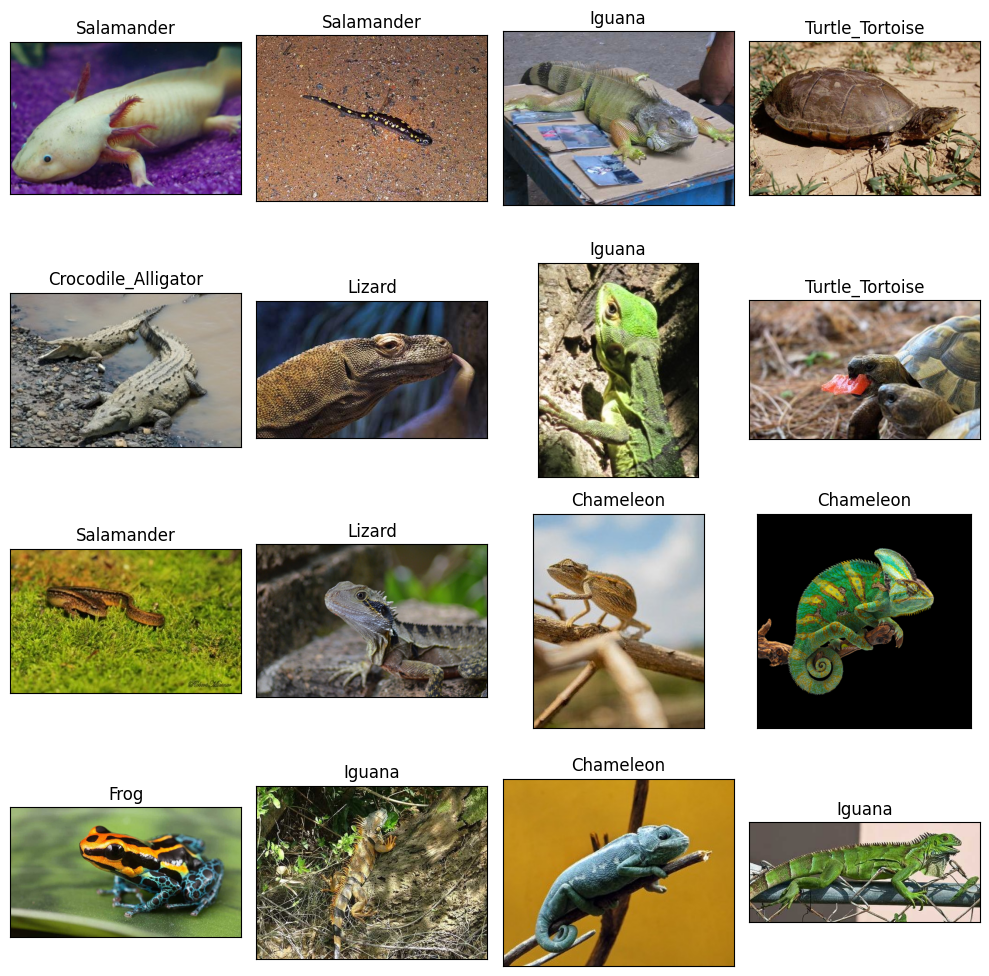

In [18]:
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

# Tranning

## **Split train test**

In [46]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [47]:
# Ukuran gambar & batch
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Generator untuk train & val (dengan augmentasi)
train_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input,
    validation_split=0.2,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    fill_mode='nearest'
)

test_generator = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [48]:
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 4802 validated image filenames belonging to 8 classes.
Found 1200 validated image filenames belonging to 8 classes.
Found 1501 validated image filenames belonging to 8 classes.


## **Load ResNet50 + Custom Classifier**

In [64]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Resizing, Rescaling
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report, confusion_matrix

In [65]:
# Base model (tanpa top layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze pretrained weights
base_model.trainable = False

In [66]:
# Custom classifier

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(8, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.build(input_shape=(None,224, 224, 3))

# # Menampilkan arsitektur model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,604,104 (90.04 MB)

 Trainable params: 16,392 (64.03 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [67]:
# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss",
                               patience = 3,
                               restore_best_weights = True)

In [68]:
# Create checkpoint callback
checkpoint_path = "animals_classification_model_checkpoint.weights.h5"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

In [69]:
history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=100,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs",
                                    "animal_classification"),
        checkpoint_callback,
    ]
)

Saving TensorBoard log files to: training_logs/animal_classification/20250622-140409
Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 133s 810ms/step - accuracy: 0.2029 - loss: 2.4750 - val_accuracy: 0.5975 - val_loss: 1.2464
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 118s 677ms/step - accuracy: 0.4504 - loss: 1.5302 - val_accuracy: 0.7633 - val_loss: 0.8211
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 103s 679ms/step - accuracy: 0.6162 - loss: 1.1031 - val_accuracy: 0.8200 - val_loss: 0.6479
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 102s 675ms/step - accuracy: 0.7062 - loss: 0.8850 - val_accuracy: 0.8358 - val_loss: 0.5514
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 143s 678ms/step - accuracy: 0.7549 - loss: 0.7389 - val_accuracy: 0.8475 - val_loss: 0.4951
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 101s 672ms/step - accuracy: 0.7710 - loss: 0.6681 - val_accuracy: 0.8558 - val_loss: 0.4601
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 102s 673ms/step - accuracy: 0.8002 - loss: 0.6078 - val_accuracy: 0.8675 - v

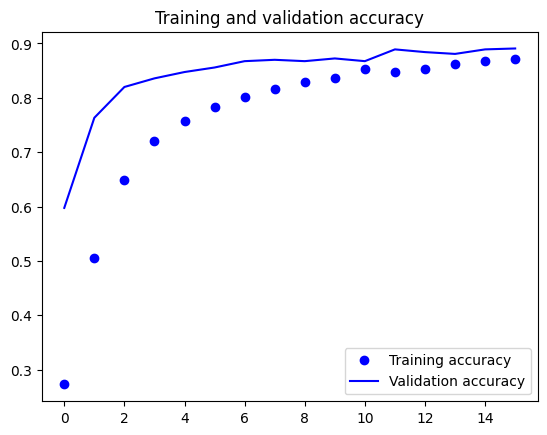

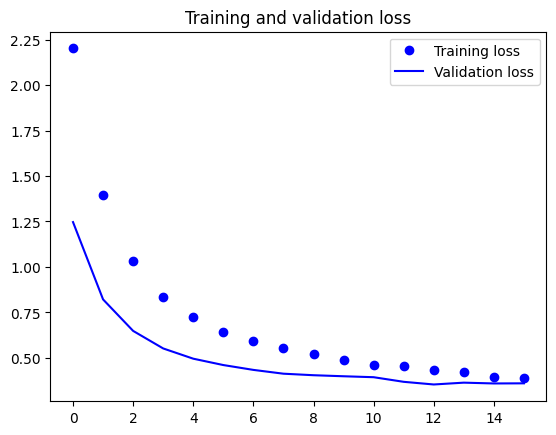

In [70]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

# **Evaluation**

In [71]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.34375
Test Accuracy: 89.61%


In [72]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

# Display the result
print(f'The first 5 predictions: {pred[:5]}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step
The first 5 predictions: ['Lizard', 'Snake', 'Snake', 'Crocodile_Alligator', 'Chameleon']


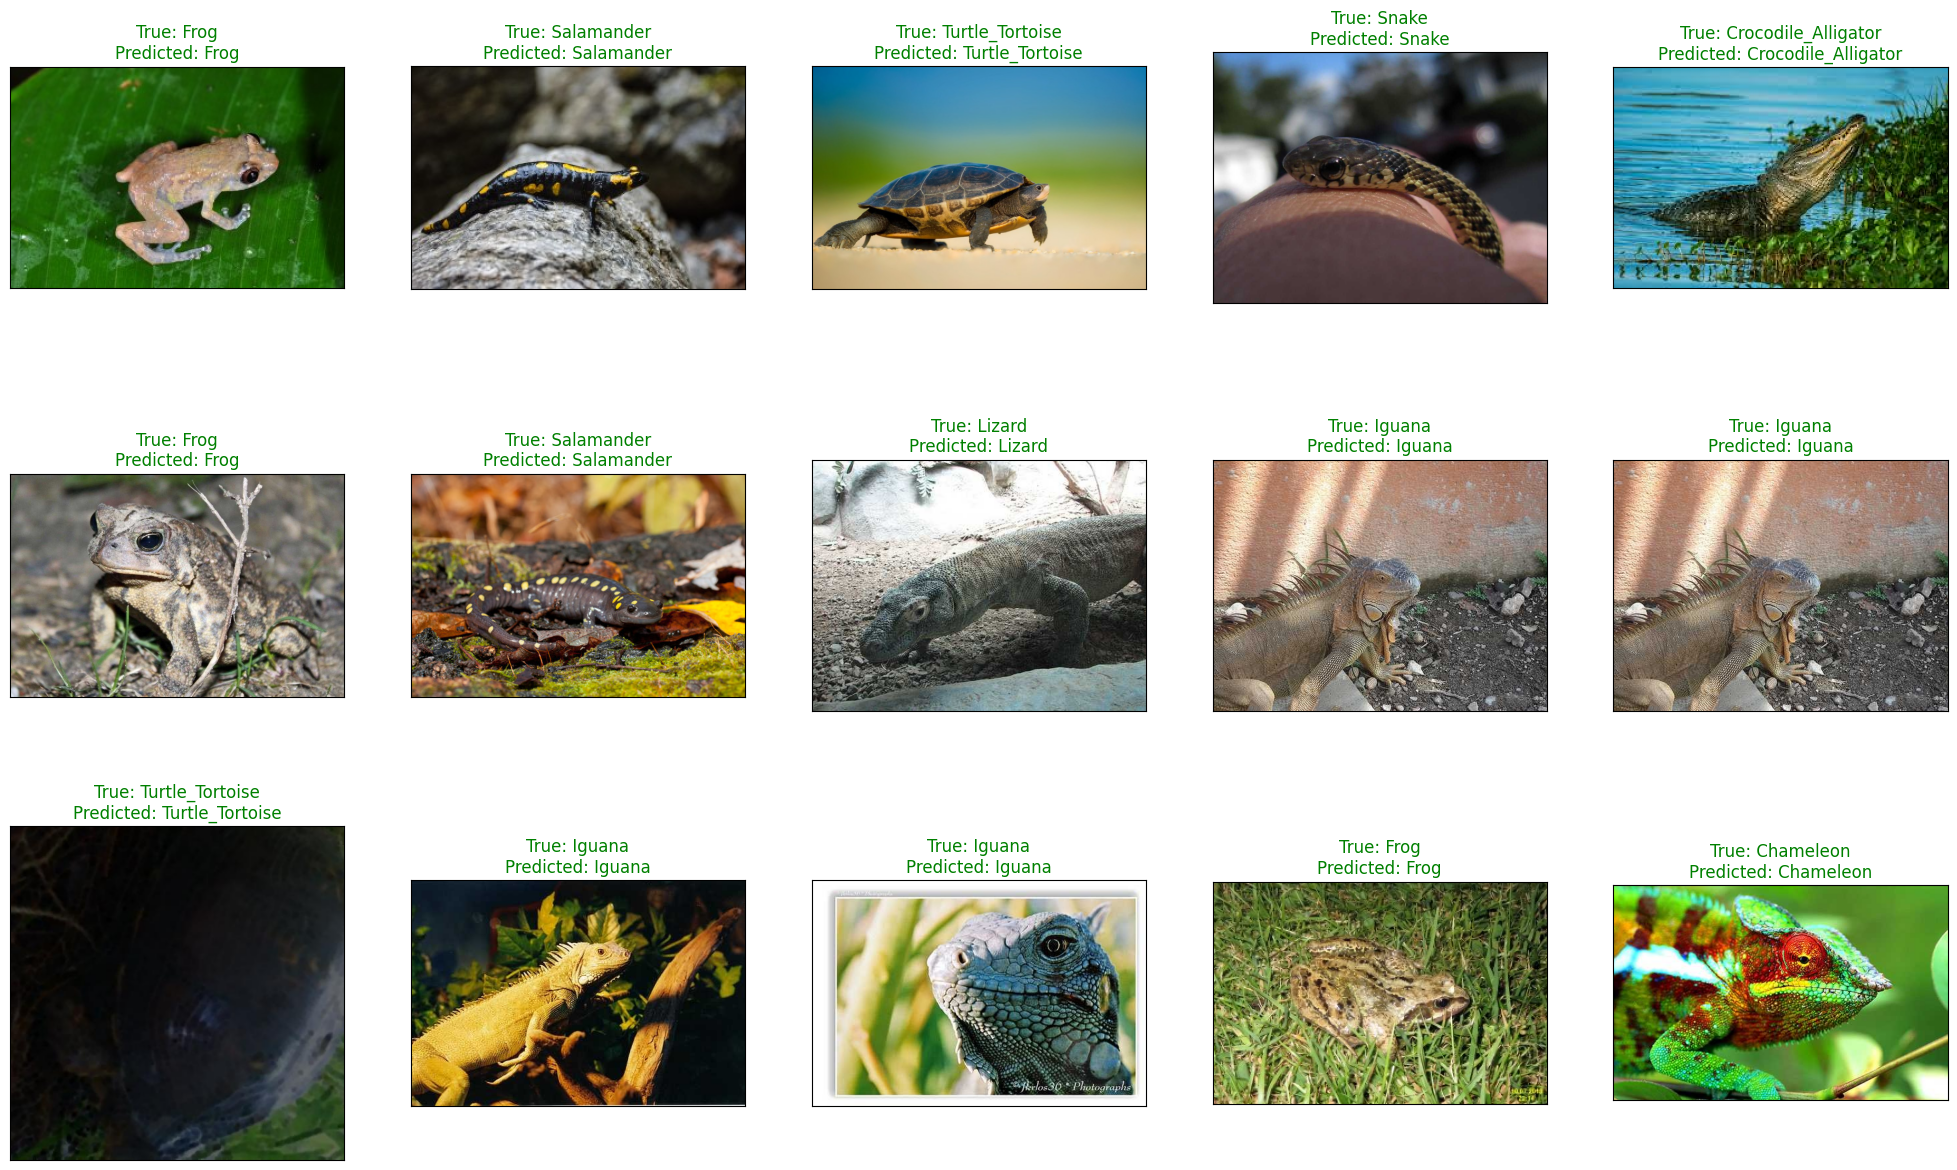

<Figure size 640x480 with 0 Axes>

In [81]:
  # Display 25 random pictures from the dataset with their labels
random_index = np.random.randint(0, len(test_df) - 1, 15)
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[random_index[i]]))
    if test_df.Label.iloc[random_index[i]] == pred[random_index[i]]:
      color = "green"
    else:
      color = "red"
    ax.set_title(f"True: {test_df.Label.iloc[random_index[i]]}\nPredicted: {pred[random_index[i]]}", color=color)
plt.show()
plt.tight_layout()

In [73]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                     precision    recall  f1-score   support

          Chameleon       0.89      0.90      0.90       147
Crocodile_Alligator       0.92      0.88      0.90       176
               Frog       0.94      0.95      0.94       201
             Iguana       0.84      0.83      0.84       195
             Lizard       0.76      0.78      0.77       176
         Salamander       0.96      0.91      0.93       224
              Snake       0.90      0.98      0.94       179
    Turtle_Tortoise       0.94      0.93      0.94       203

           accuracy                           0.90      1501
          macro avg       0.89      0.89      0.89      1501
       weighted avg       0.90      0.90      0.90      1501



# Export Model

In [82]:
model.save("export/model.h5")
model.save("export/model.keras")